In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.mlab as mlab

In [2]:
from fatiando.vis import mpl
from fatiando import mesher, gridder, utils
from fatiando.mesher import Sphere
from fatiando.gridder import regular
from fatiando.gravmag import sphere
from fatiando.constants import G, SI2MGAL,SI2EOTVOS

C:\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
import auxiliary_functions as af


In [4]:
regular_grid = dict() #empty dictionary

regular_grid['area'] = [-1000, 1000, -1000, 1000]
regular_grid['shape'] = (100,100)

In [5]:
#total number of data
regular_grid['N'] = regular_grid['shape'][0]*regular_grid['shape'][1]

#grid spacing along the y and x directions
regular_grid['spacing'] = gridder.spacing(regular_grid['area'], regular_grid['shape'])

#element of area used in the numerical integration
regular_grid['DS'] = regular_grid['spacing'][0]*regular_grid['spacing'][1]

In [6]:
for r in regular_grid:
    print r, ':', regular_grid[r]

shape : (100, 100)
N : 10000
spacing : [20.2020202020202, 20.2020202020202]
DS : 408.121620243
area : [-1000, 1000, -1000, 1000]


In [7]:
#coordinates x and y of the data
xi, yi = regular(regular_grid['area'], regular_grid['shape'])

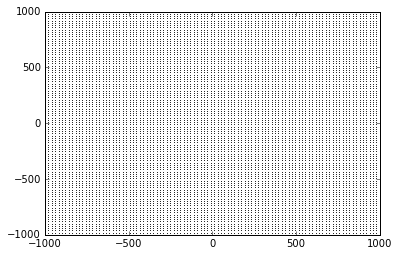

In [8]:
plt.plot(yi, xi, 'k.', markersize=1)

In [9]:
# vertical coordinates of the data in a plane
#data_heigh = -50.
data_heigh  = 0.0

zi = np.zeros_like(xi) + data_heigh


In [10]:
assert (xi.size == regular_grid['N']) and (yi.size == regular_grid['N']) and (zi.size == regular_grid['N']),  \
                'xp and yp and zp must have the same size difined by shape'


In [11]:
xk = 0.0
yk = 0.0
zk = 700.0
#radius = 650.0
radius = 699.0
rho =  600.00
model = [Sphere(xk, yk, zk, radius,props={'density':rho})]

In [12]:
g = sphere.gz(xi,yi,zi,model,dens=None)

(-1000.0, 1000.0, -1000.0, 1000.0)

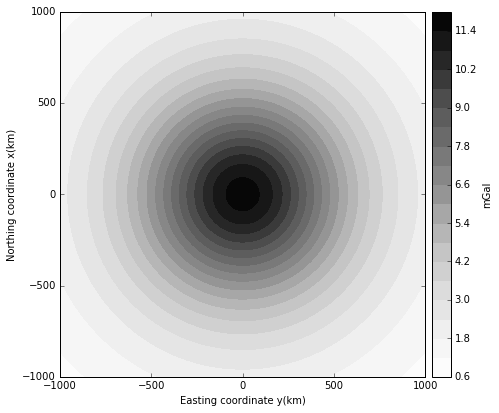

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plt.xlabel('Easting coordinate y(km)')
plt.ylabel('Northing coordinate x(km)')
plt.contourf(np.reshape(yi, regular_grid['shape']), np.reshape(xi, regular_grid['shape']), np.reshape(g, regular_grid['shape']),
                     20, cmap='Greys')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)
cbar.set_label('mGal')
ax.axis('scaled')

In [14]:
print min(g), max(g)
max1= max(g)

1.02044953272 11.682215004


In [15]:
xk = 0.0
yk = 0.0
zk2 = 1550.0
#zk2 = 7000.0
model2 = [Sphere(xk, yk, zk2, radius,props={'density':rho})]

In [16]:
g2 = sphere.gz(xi,yi,zi,model2,dens=None)

(-1000.0, 1000.0, -1000.0, 1000.0)

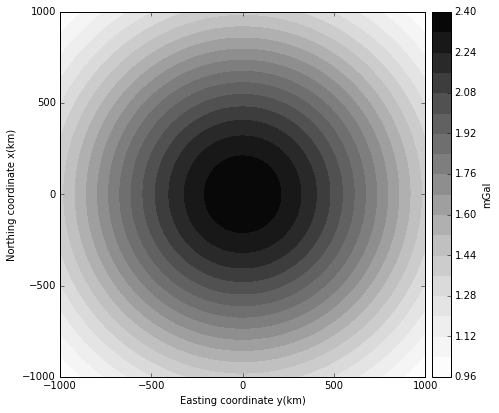

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plt.xlabel('Easting coordinate y(km)')
plt.ylabel('Northing coordinate x(km)')
plt.contourf(np.reshape(yi, regular_grid['shape']), np.reshape(xi, regular_grid['shape']), np.reshape(g2, regular_grid['shape']),
                     20, cmap='Greys')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)
cbar.set_label('mGal')
ax.axis('scaled')

In [18]:
print min(g2), max(g2)
max2 = max(g2)

0.961114574436 2.38382179614


In [19]:
diff = max1 - max2
print 'Maximum of the diference of the gravity:',diff, 'mGal'

Maximum of the diference of the gravity: 9.2983932079 mGal


In [20]:
Error_Depth = zk2 - zk
print 'Diference of the depth-to-center:',Error_Depth, 'm'

Diference of the depth-to-center: 850.0 m


#### Analitical difference of the z-component of the gravity at $x_i, y_i$ and $ z_i$ = 0.0  produced by two spheres whose centers are located at the same horizontal coordinates $x_k, y_k$ = 0.0  and at different depths $ z_1$ and $z_2$ 
$\Delta_g{z}= - \gamma \: \: \dot \: \: mass \: \: [ {z_1}^3 z_2 - {z_2}^3 z_1 ] /  {z_1}^3 \dot {z_2}^3 $ 


In [21]:
mass = rho*4.*np.pi*(radius**3)/3.
Delta_g = - mass *G*SI2MGAL * ( (zk**3 * zk2) - (zk2**3*zk))/(zk**3*zk2**3)
print 'mass', mass
print 'Difference of the depth-to-center:', zk2 - zk, 'm'
print 'Analitical difference of the gravity',Delta_g, 'mGal'

mass 8.58363786547e+11
Difference of the depth-to-center: 850.0 m
Analitical difference of the gravity 9.3053878484 mGal
